In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_processing.utils import *
%matplotlib inline

In [2]:
walking_files = ['Activity-Data/Samsung/Walk/Walk_N2/Walk_N2Pressure_clean.csv', 'Activity-Data/Samsung/Walk/Walk_N_3/Walk_N_3Pressure_clean.csv', 
                 'Activity-Data/Samsung/Walk/Walk_N/Walk_NPressure_clean.csv', 'Activity-Data/Samsung/Walk/Walk_P1/Walk_P1Pressure_clean.csv',
                 'Activity-Data/Samsung/Walk/Walk_P2/Walk_P2Pressure_clean.csv', 'Activity-Data/Walking/01/Walking01Pressure_clean.csv', 
                 'Activity-Data/Walking/2/Walking2Pressure_clean.csv', 'Activity-Data/Walking/3/Walking3Pressure_clean.csv', 
                 'Activity-Data/Walking/04/Walking04Pressure_clean.csv','Activity-Data/Walking/5/Walking5Pressure_clean.csv']

In [4]:
def create_features(input_file, windows_time, col_index, usecols = [0,1,2]):
    df = pd.read_csv(input_file, delimiter=',', header=0, skipinitialspace=True, usecols=usecols)
    windows, ts_windows = create_sliding_windows_by_time(df, col_index, windows_time)
    skew_windows = compute_skew_window(windows)
    percentile = compute_percentile_norm_window(windows)
    iqr = compute_inter_quartile_distance_window(windows)
    kurtosis = compute_kurtosis_window(windows)
    std_deviation = compute_std_deviation_window(windows)
    derivative = compute_sum_derivative_window(windows, ts_windows)
    median = np.median(df['pressure'].values)
    df['pressure_norm'] = df['pressure'].apply(lambda x: x-median)    
    norm_windows, norm_ts = create_sliding_windows_by_time(df, 3, windows_time)
    norm = compute_norm_window(norm_windows)
    print(input_file)
    plt.figure()
    plt.plot(df['pressure'], label='pressure raw')
    plt.title('Raw')
    plt.show()
#     plt.figure()
#     plt.plot(df['pressure'])
#     plt.subplot_tool()
    plt.subplot(4, 2, 1)
    plt.plot(skew_windows, label='skew')
    plt.title('skew')
    plt.subplot(4, 2, 2)
    percentile_g = plt.plot(percentile, label='percentile')
    plt.title('percentile')
    plt.subplot(4, 2, 3)
    plt.plot(iqr, label='iqr')
    plt.title('iqr')
    plt.subplot(4, 2, 4)   
    plt.plot(kurtosis, label='kurtosis')
    plt.title('kurtosis')
    plt.subplot(4, 2, 5)
    plt.plot(std_deviation, label='std')
    plt.title('std')
    plt.subplot(4, 2, 6)
    plt.plot(derivative, label='derivative')
    plt.title('derivative')
    plt.subplot(4, 2, 7)
    plt.plot(norm, label='derivative')
    plt.title('norm')
    plt.tight_layout()
#     plt.legend([skew_g, percentile_g, iqr_g, kurtosis_g, std_g, derivative_g])
    plt.show()
    

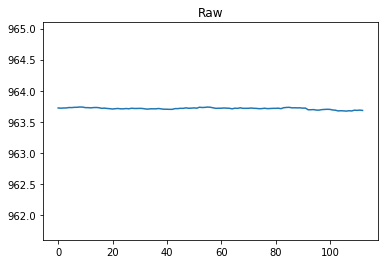

In [7]:
input_file = walking_files[8]
df = pd.read_csv(input_file, delimiter=',', header=0, skipinitialspace=True, usecols=[0,1,2])
plt.figure()
plt.plot(df['pressure'], label='pressure raw')
plt.title('Raw')
plt.ylim(961.6,965.1)
plt.show()

Activity-Data/Samsung/Walk/Walk_N2/Walk_N2Pressure_clean.csv


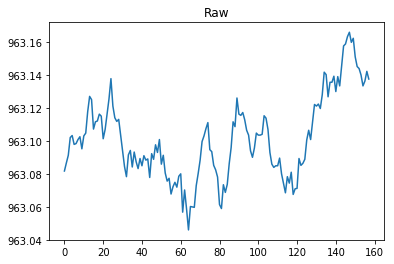

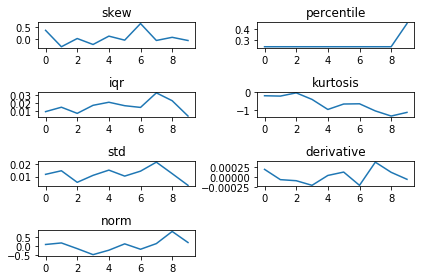

Activity-Data/Samsung/Walk/Walk_N_3/Walk_N_3Pressure_clean.csv


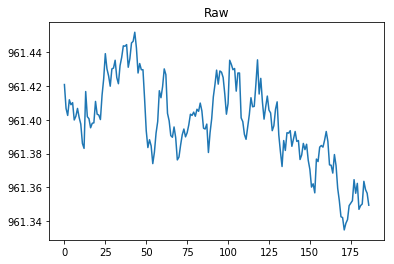

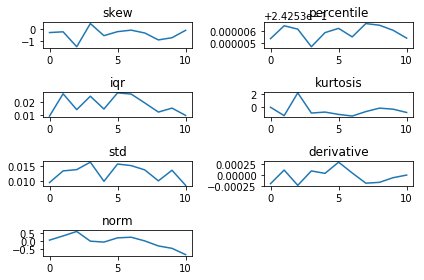

Activity-Data/Samsung/Walk/Walk_N/Walk_NPressure_clean.csv


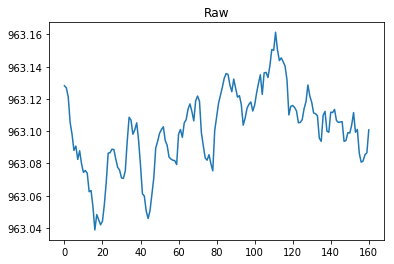

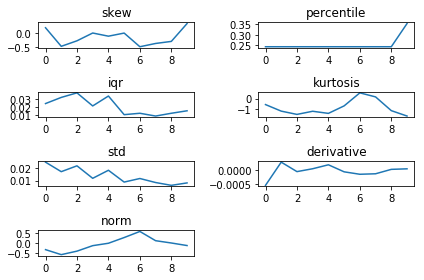

Activity-Data/Samsung/Walk/Walk_P1/Walk_P1Pressure_clean.csv


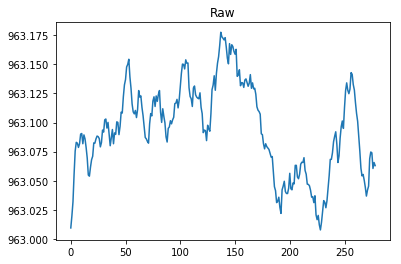

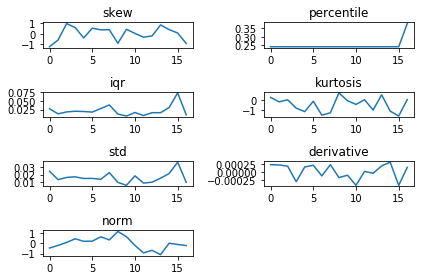

Activity-Data/Samsung/Walk/Walk_P2/Walk_P2Pressure_clean.csv


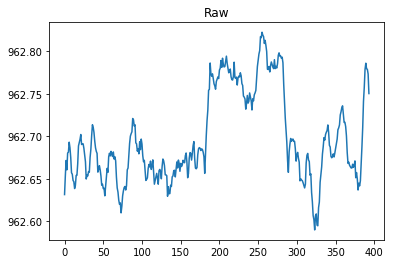

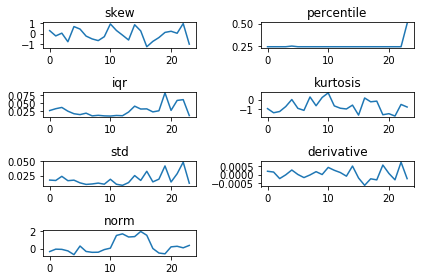

Activity-Data/Walking/01/Walking01Pressure_clean.csv


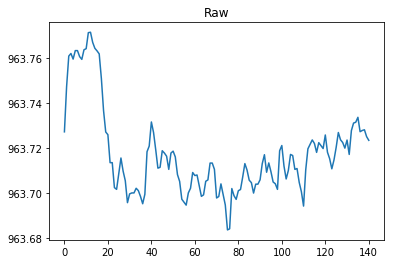

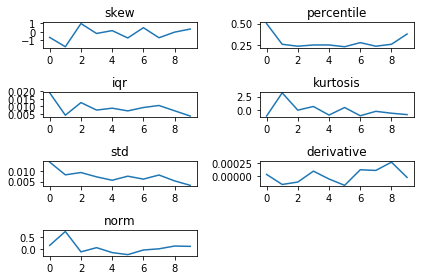

Activity-Data/Walking/2/Walking2Pressure_clean.csv


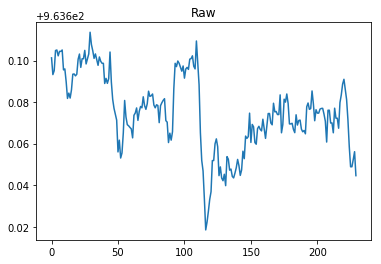

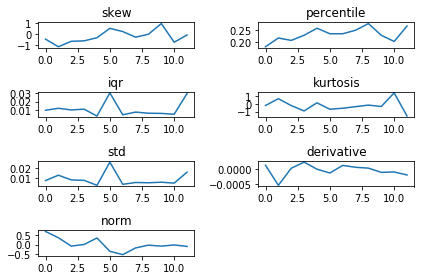

Activity-Data/Walking/3/Walking3Pressure_clean.csv


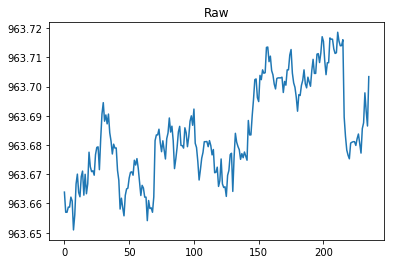

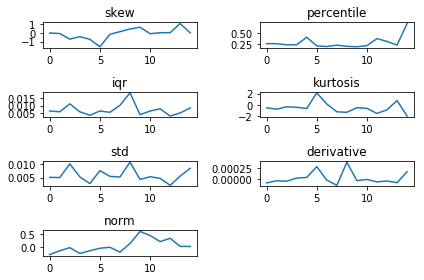

Activity-Data/Walking/04/Walking04Pressure_clean.csv


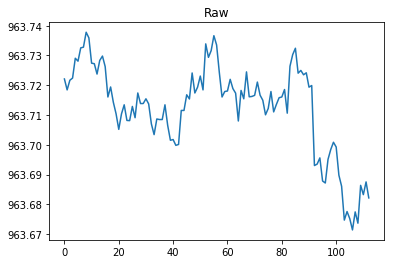

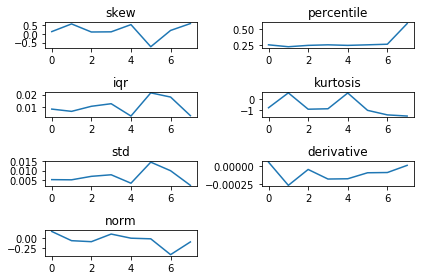

Activity-Data/Walking/5/Walking5Pressure_clean.csv


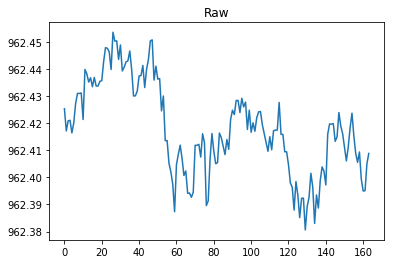

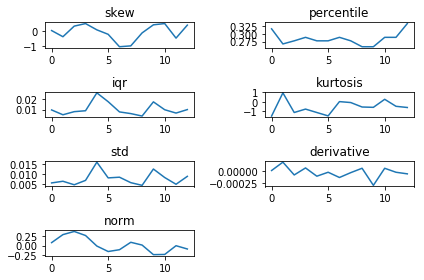

In [5]:
for walking_file in walking_files[:10]:
    create_features(walking_file, 3000, 1)

Activity-Data/Samsung/Walk/Walk_N2/Walk_N2Pressure_clean.csv


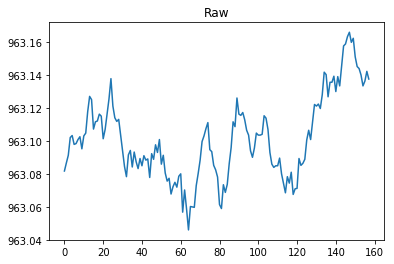

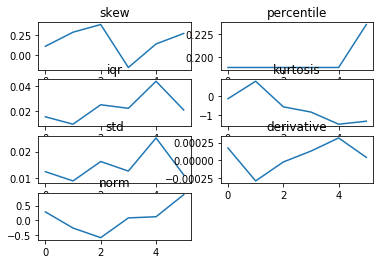

Activity-Data/Samsung/Walk/Walk_N_3/Walk_N_3Pressure_clean.csv


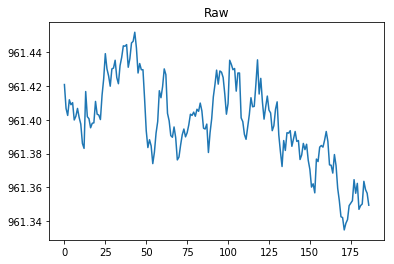

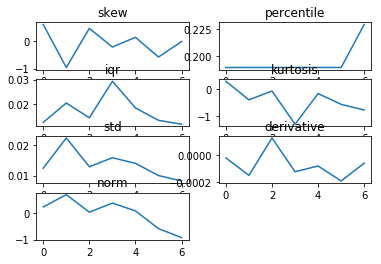

Activity-Data/Samsung/Walk/Walk_N/Walk_NPressure_clean.csv


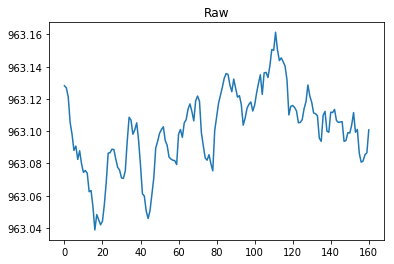

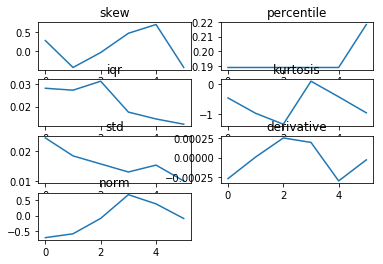

Activity-Data/Samsung/Walk/Walk_P1/Walk_P1Pressure_clean.csv


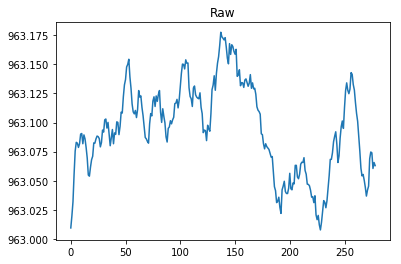

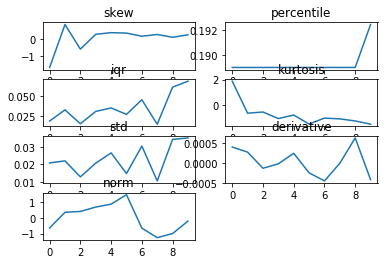

Activity-Data/Samsung/Walk/Walk_P2/Walk_P2Pressure_clean.csv


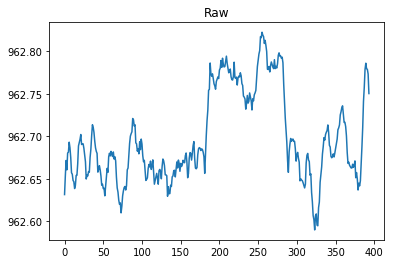

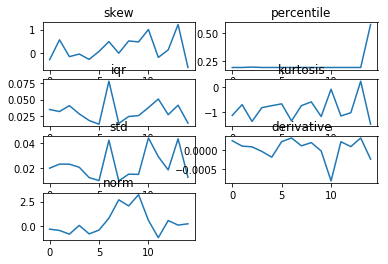

Activity-Data/Walking/01/Walking01Pressure_clean.csv


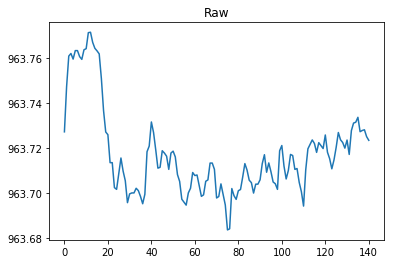

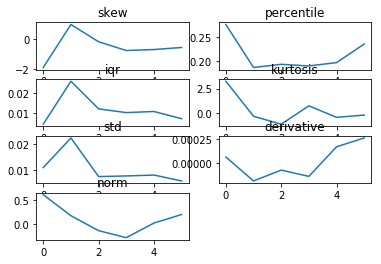

Activity-Data/Walking/2/Walking2Pressure_clean.csv


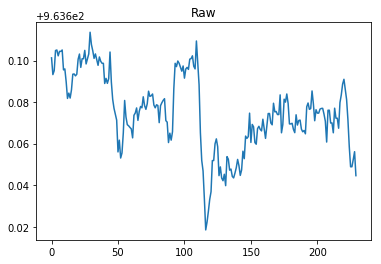

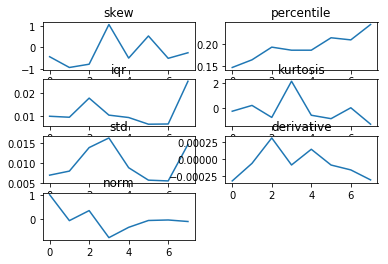

Activity-Data/Walking/3/Walking3Pressure_clean.csv


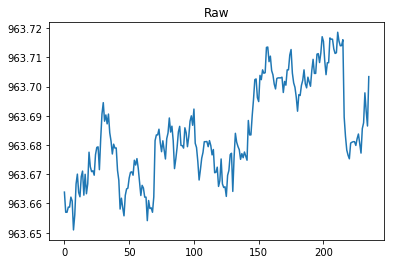

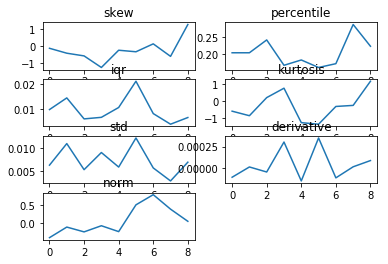

Activity-Data/Walking/04/Walking04Pressure_clean.csv


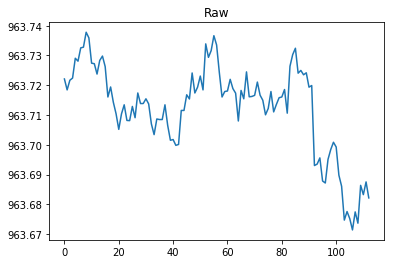

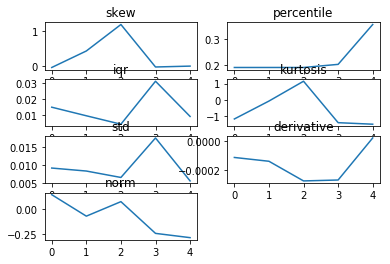

Activity-Data/Walking/5/Walking5Pressure_clean.csv


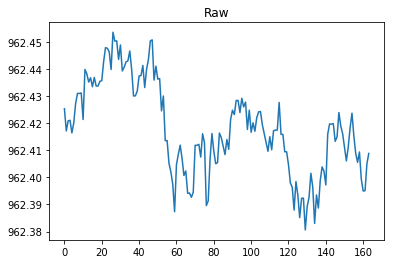

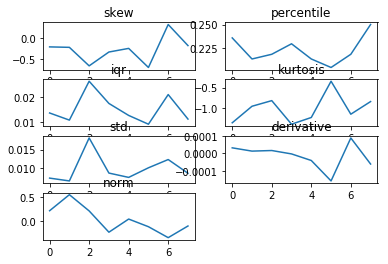

In [5]:
for walking_file in walking_files:
    create_features(walking_file, 5000, 1)

In [6]:
climbing_files = ['Activity-Data/Samsung/Climbing_Up/Climb_Up_1/Climb_Up_1Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Up/Climb_Up_2/Climb_Up_2Pressure_clean.csv',    
                 'Activity-Data/Samsung/Climbing_Up/Climb_Up_3/Climb_Up_3Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Up/Climb_Up_4/Climb_Up_4Pressure_clean.csv',    
                 'Activity-Data/Samsung/Climbing_Up/Climb_Up_4/Climb_Up_4Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Up/Climb_Up_6/Climb_Up_6Pressure_clean.csv',
                 'Activity-Data/Samsung/Climbing_Up/Climb_Up_7/Climb_Up_7Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Up/Climb_Up_8/Climb_Up_8Pressure_clean.csv',
                 'Activity-Data/Climbing_Stairs/1/Climbing_Stairs1Pressure_clean.csv', 'Activity-Data/Climbing_Stairs/2/Climbing_Stairs2Pressure_clean.csv', 
                 'Activity-Data/Climbing_Stairs/3/Climbing_Stairs3Pressure_clean.csv', 'Activity-Data/Climbing_Stairs/5/Climbing_Stairs5Pressure_clean.csv',
                 'Activity-Data/Climbing_Stairs/6/Climbing_Stairs6Pressure_clean.csv', 'Activity-Data/Climbing_Stairs/7/Climbing_Stairs7Pressure_clean.csv']

Activity-Data/Samsung/Climbing_Up/Climb_Up_1/Climb_Up_1Pressure_clean.csv


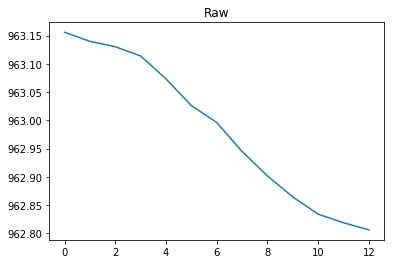

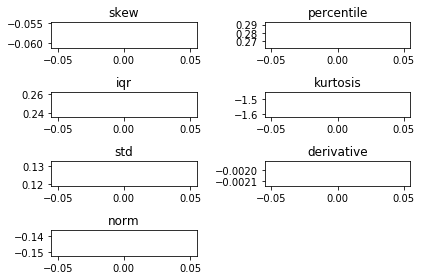

Activity-Data/Samsung/Climbing_Up/Climb_Up_2/Climb_Up_2Pressure_clean.csv


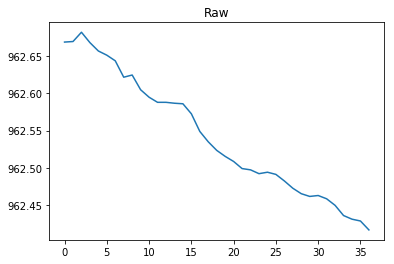

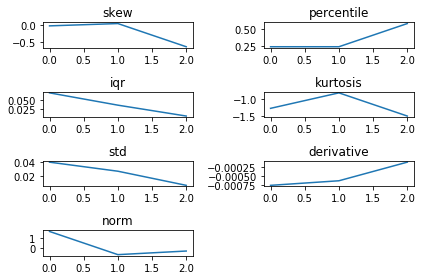

Activity-Data/Samsung/Climbing_Up/Climb_Up_3/Climb_Up_3Pressure_clean.csv


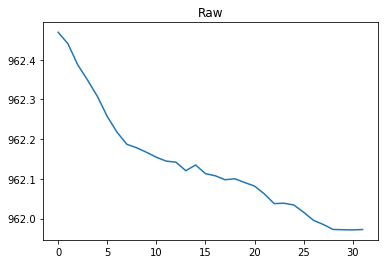

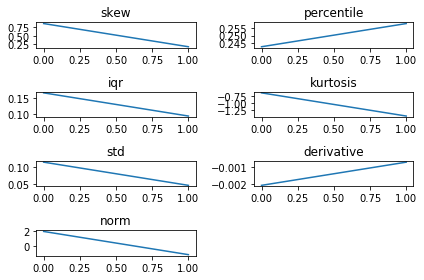

Activity-Data/Samsung/Climbing_Up/Climb_Up_4/Climb_Up_4Pressure_clean.csv


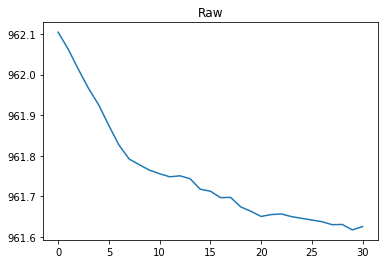

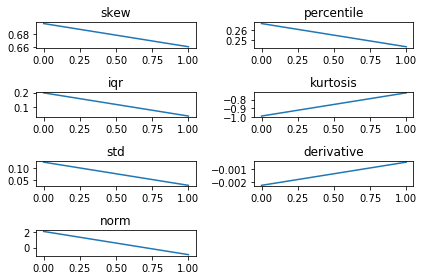

Activity-Data/Samsung/Climbing_Up/Climb_Up_6/Climb_Up_6Pressure_clean.csv


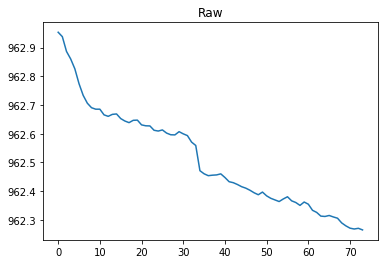

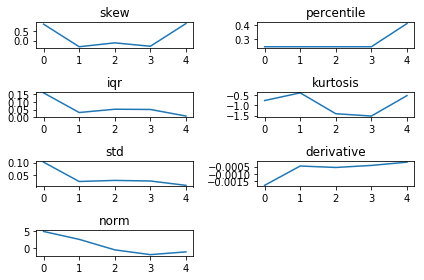

Activity-Data/Samsung/Climbing_Up/Climb_Up_7/Climb_Up_7Pressure_clean.csv


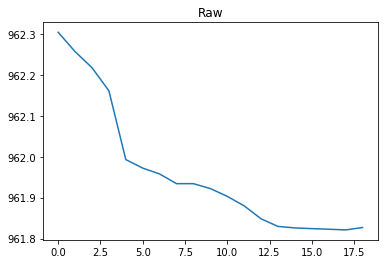

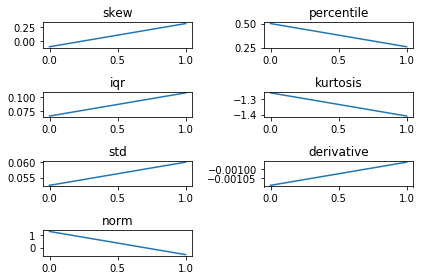

Activity-Data/Samsung/Climbing_Up/Climb_Up_8/Climb_Up_8Pressure_clean.csv


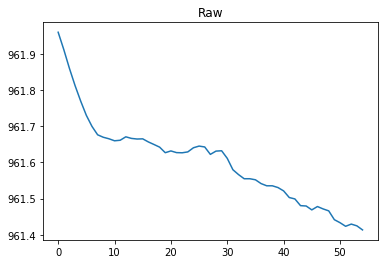

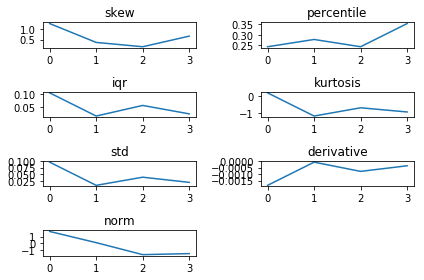

Activity-Data/Climbing_Stairs/1/Climbing_Stairs1Pressure_clean.csv


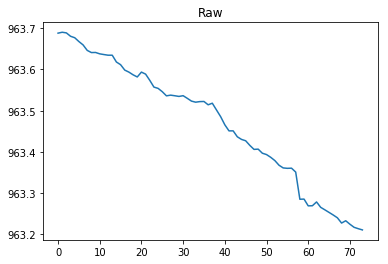

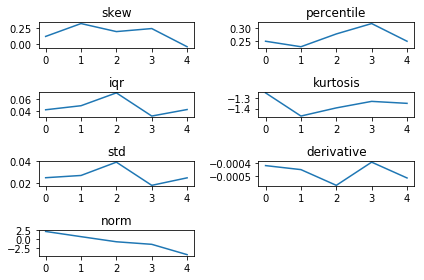

Activity-Data/Climbing_Stairs/2/Climbing_Stairs2Pressure_clean.csv


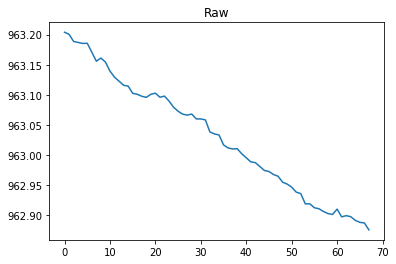

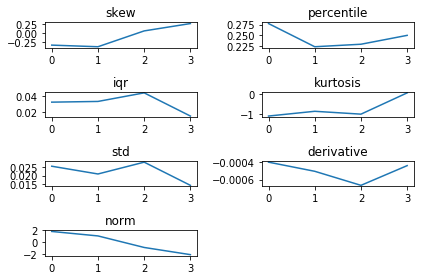

Activity-Data/Climbing_Stairs/3/Climbing_Stairs3Pressure_clean.csv


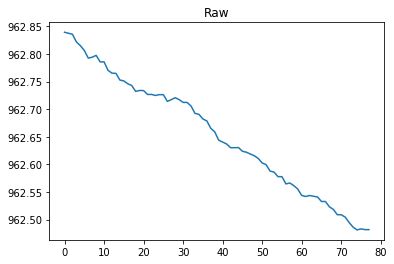

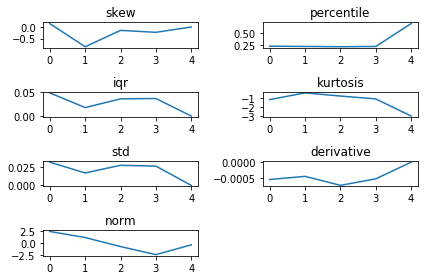

In [6]:
for climbing_file in climbing_files[:10]:
    create_features(climbing_file, 3000, 1)

Activity-Data/Samsung/Climbing_Up/Climb_Up_1/Climb_Up_1Pressure_clean.csv


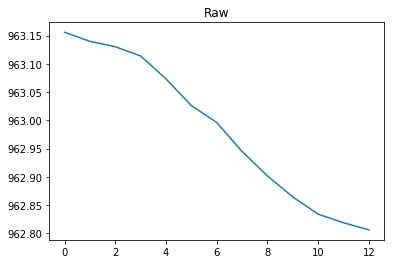

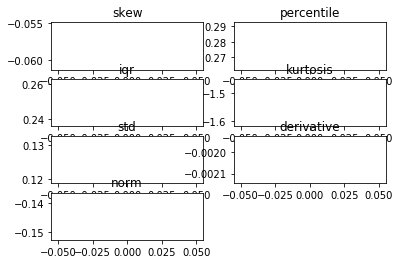

Activity-Data/Samsung/Climbing_Up/Climb_Up_2/Climb_Up_2Pressure_clean.csv


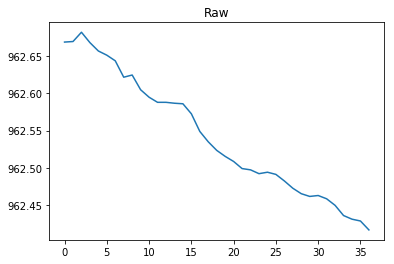

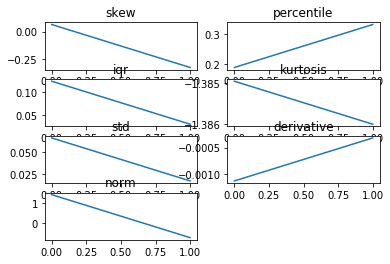

Activity-Data/Samsung/Climbing_Up/Climb_Up_3/Climb_Up_3Pressure_clean.csv


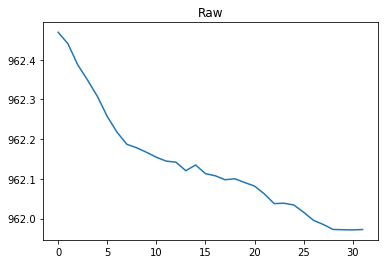

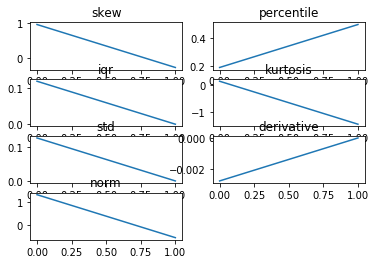

Activity-Data/Samsung/Climbing_Up/Climb_Up_4/Climb_Up_4Pressure_clean.csv


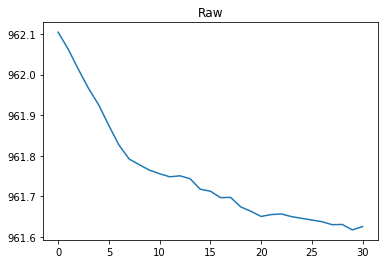

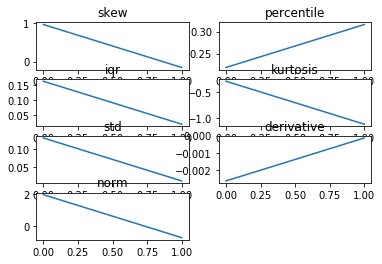

Activity-Data/Samsung/Climbing_Up/Climb_Up_4/Climb_Up_4Pressure_clean.csv


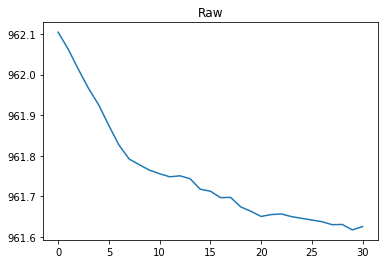

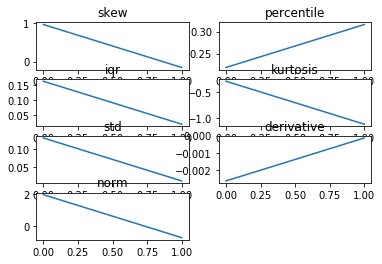

Activity-Data/Samsung/Climbing_Up/Climb_Up_6/Climb_Up_6Pressure_clean.csv


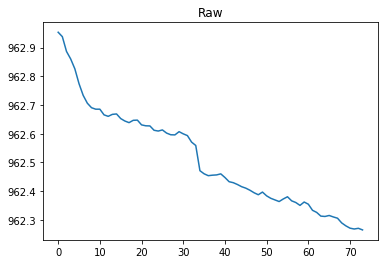

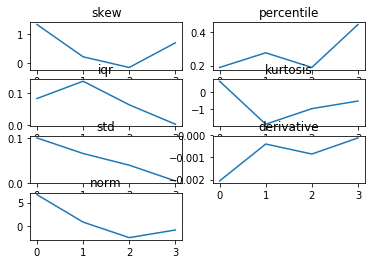

Activity-Data/Samsung/Climbing_Up/Climb_Up_7/Climb_Up_7Pressure_clean.csv


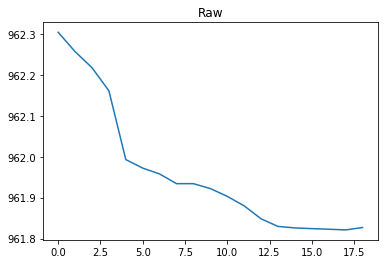

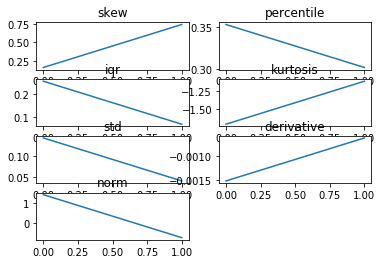

Activity-Data/Samsung/Climbing_Up/Climb_Up_8/Climb_Up_8Pressure_clean.csv


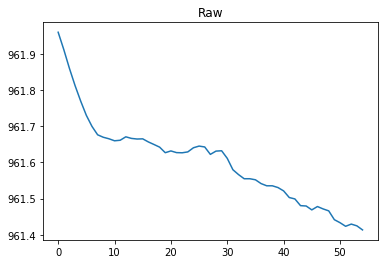

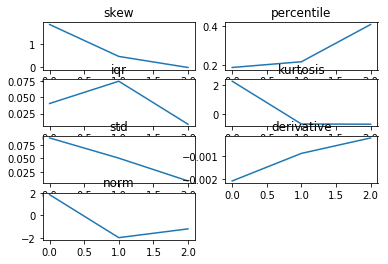

Activity-Data/Climbing_Stairs/1/Climbing_Stairs1Pressure_clean.csv


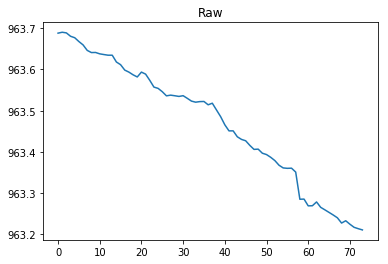

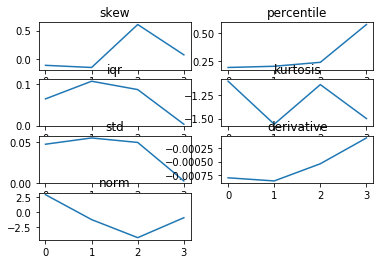

Activity-Data/Climbing_Stairs/2/Climbing_Stairs2Pressure_clean.csv


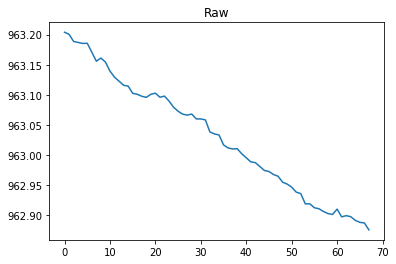

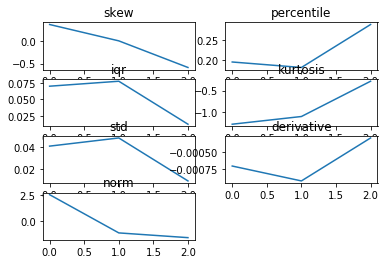

Activity-Data/Climbing_Stairs/3/Climbing_Stairs3Pressure_clean.csv


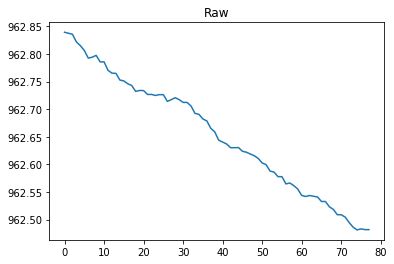

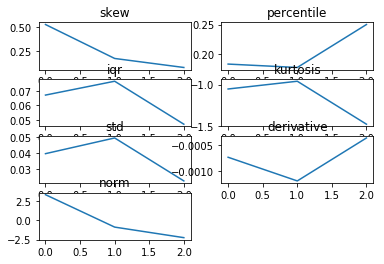

Activity-Data/Climbing_Stairs/5/Climbing_Stairs5Pressure_clean.csv


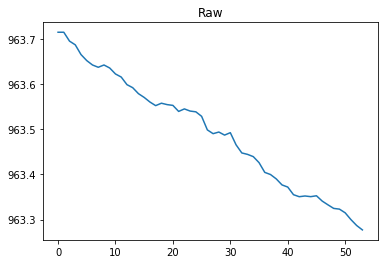

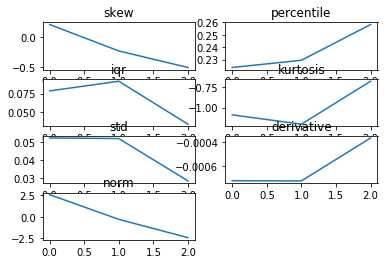

Activity-Data/Climbing_Stairs/6/Climbing_Stairs6Pressure_clean.csv


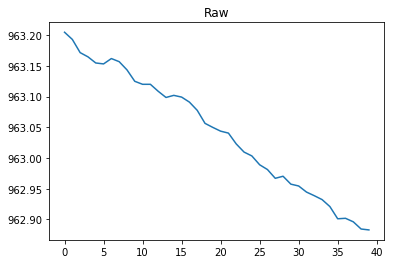

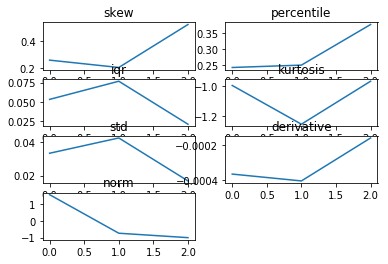

Activity-Data/Climbing_Stairs/7/Climbing_Stairs7Pressure_clean.csv


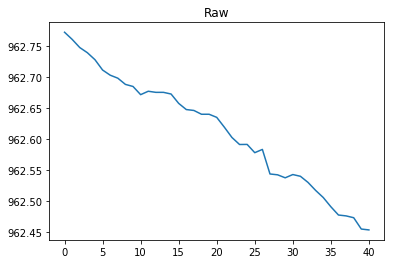

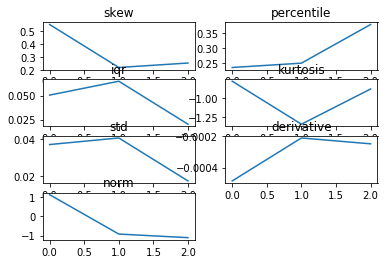

In [8]:
for climbing_file in climbing_files:
    create_features(climbing_file, 5000, 1)

In [9]:
downstairs_files = ['Activity-Data/Samsung/Climbing_Down/Climb_Down_1/Climb_Down_1Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Down/Climb_Down_2/Climb_Down_2Pressure_clean.csv',    
                    'Activity-Data/Samsung/Climbing_Down/Climb_Down_3/Climb_Down_3Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Down/Climb_Down_6/Climb_Down_6Pressure_clean.csv',
                    'Activity-Data/Samsung/Climbing_Down/Climb_Down_8/Climb_Down_8Pressure_clean.csv', 'Activity-Data/Samsung/Climbing_Down/Climb_Down_9/Climb_Down_9Pressure_clean.csv',
                    'Activity-Data/Downstairs/1/Downstairs1Pressure_clean.csv', 'Activity-Data/Downstairs/2/Downstairs2Pressure_clean.csv', 
                    'Activity-Data/Downstairs/3/Downstairs3Pressure_clean.csv', 'Activity-Data/Downstairs/4/Downstairs4Pressure_clean.csv',
                    'Activity-Data/Downstairs/5/Downstairs5Pressure_clean.csv', 'Activity-Data/Downstairs/6/Downstairs6Pressure_clean.csv']

Activity-Data/Samsung/Climbing_Down/Climb_Down_1/Climb_Down_1Pressure_clean.csv


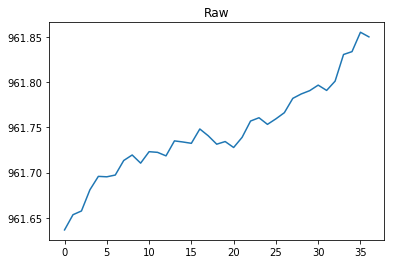

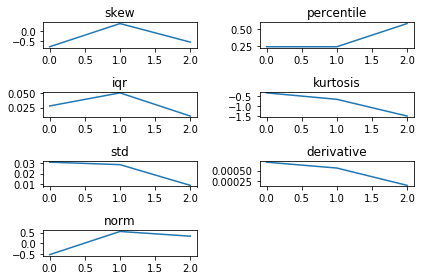

Activity-Data/Samsung/Climbing_Down/Climb_Down_2/Climb_Down_2Pressure_clean.csv


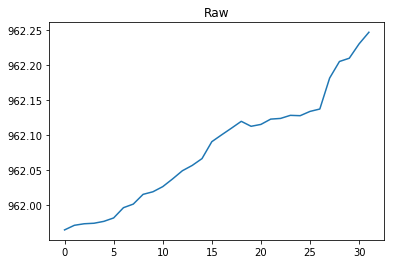

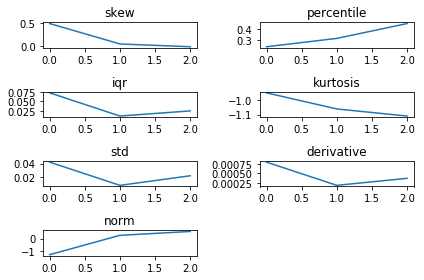

Activity-Data/Samsung/Climbing_Down/Climb_Down_3/Climb_Down_3Pressure_clean.csv


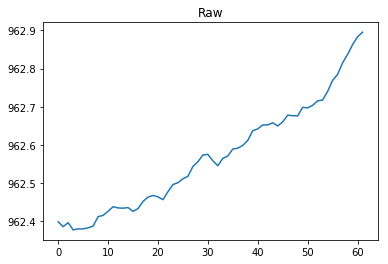

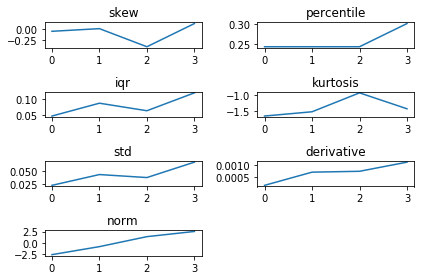

Activity-Data/Samsung/Climbing_Down/Climb_Down_6/Climb_Down_6Pressure_clean.csv


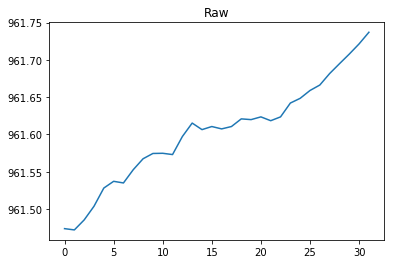

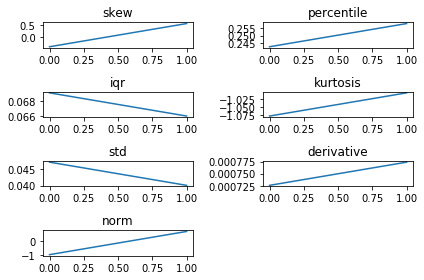

Activity-Data/Samsung/Climbing_Down/Climb_Down_8/Climb_Down_8Pressure_clean.csv


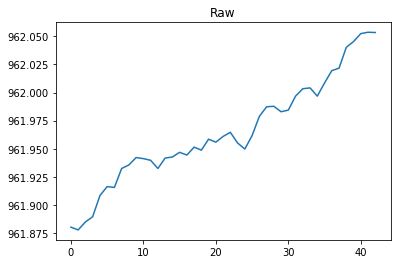

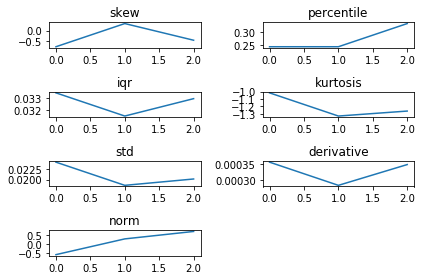

Activity-Data/Samsung/Climbing_Down/Climb_Down_9/Climb_Down_9Pressure_clean.csv


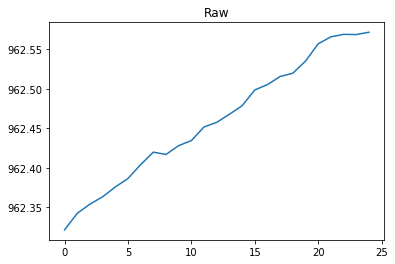

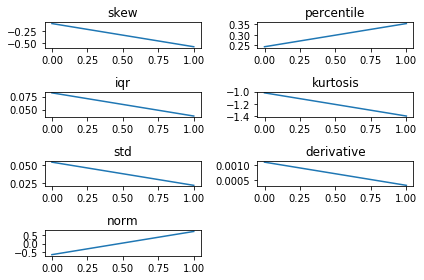

Activity-Data/Downstairs/1/Downstairs1Pressure_clean.csv


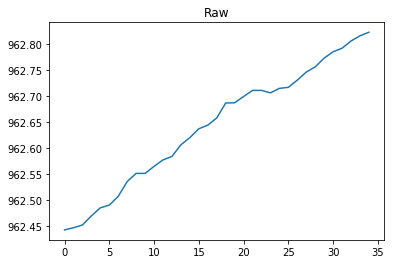

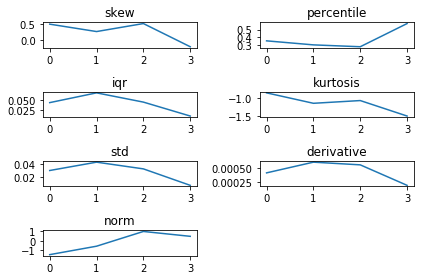

Activity-Data/Downstairs/2/Downstairs2Pressure_clean.csv


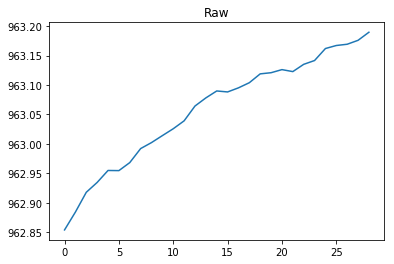

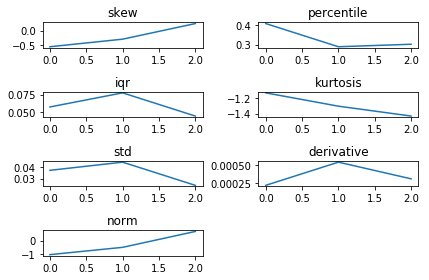

Activity-Data/Downstairs/3/Downstairs3Pressure_clean.csv


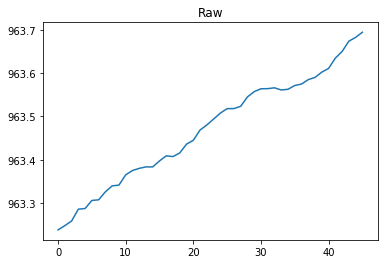

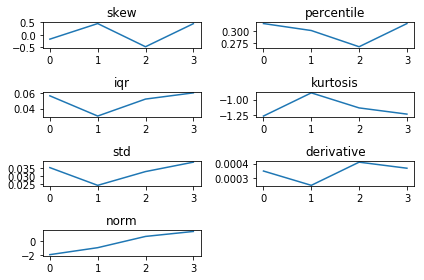

Activity-Data/Downstairs/4/Downstairs4Pressure_clean.csv


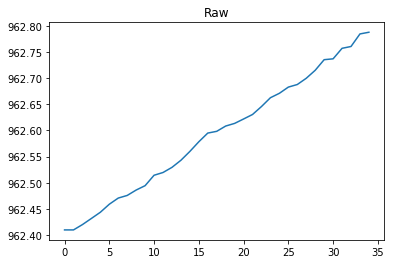

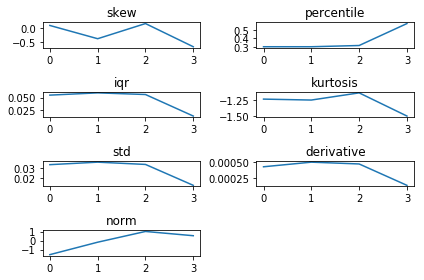

In [7]:
for downstairs_file in downstairs_files[:10]:
    create_features(downstairs_file, 3000, 1)

Activity-Data/Samsung/Climbing_Down/Climb_Down_1/Climb_Down_1Pressure_clean.csv


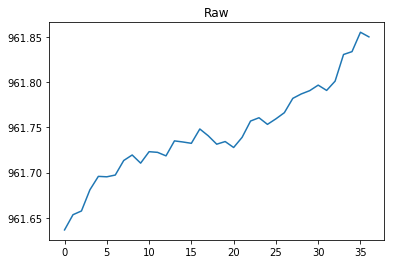

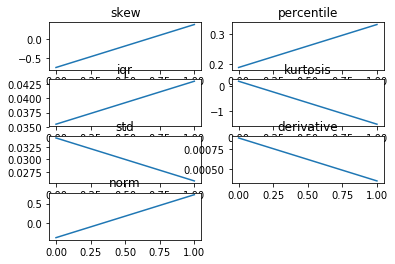

Activity-Data/Samsung/Climbing_Down/Climb_Down_2/Climb_Down_2Pressure_clean.csv


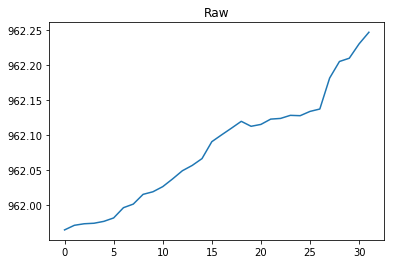

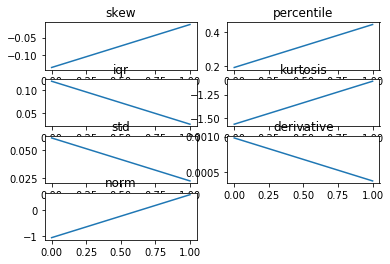

Activity-Data/Samsung/Climbing_Down/Climb_Down_3/Climb_Down_3Pressure_clean.csv


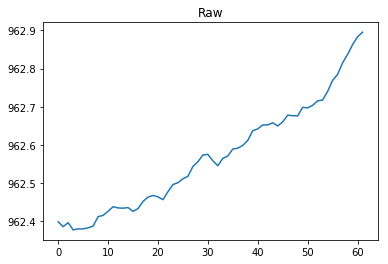

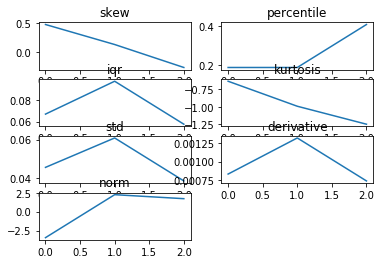

Activity-Data/Samsung/Climbing_Down/Climb_Down_6/Climb_Down_6Pressure_clean.csv


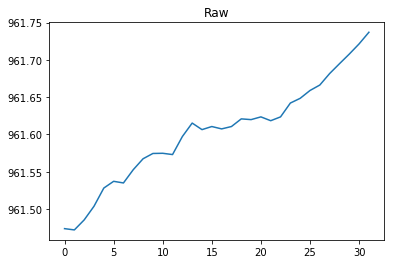

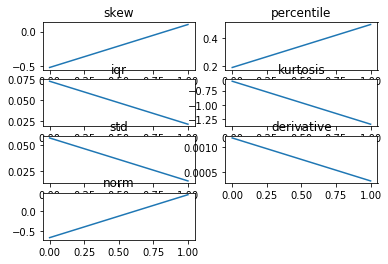

Activity-Data/Samsung/Climbing_Down/Climb_Down_8/Climb_Down_8Pressure_clean.csv


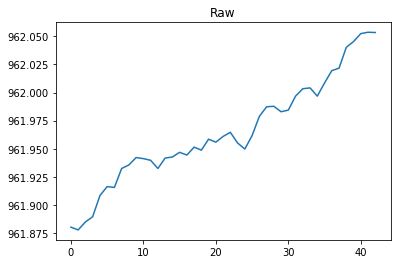

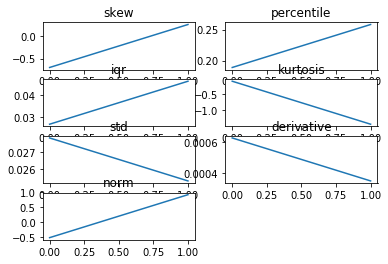

Activity-Data/Samsung/Climbing_Down/Climb_Down_9/Climb_Down_9Pressure_clean.csv


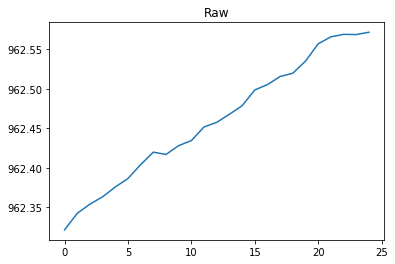

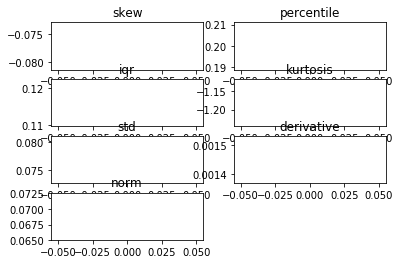

Activity-Data/Downstairs/1/Downstairs1Pressure_clean.csv


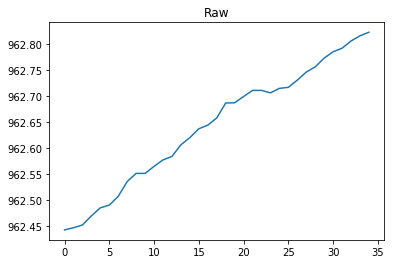

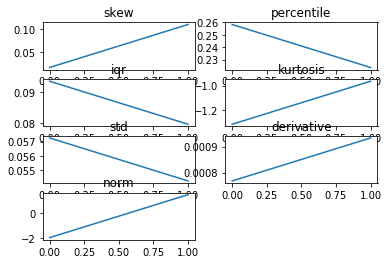

Activity-Data/Downstairs/2/Downstairs2Pressure_clean.csv


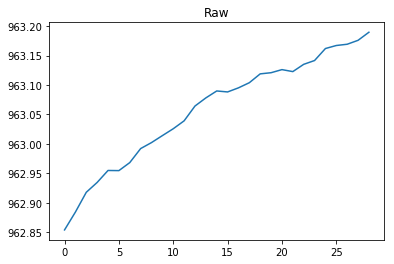

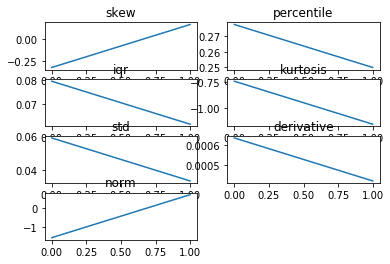

Activity-Data/Downstairs/3/Downstairs3Pressure_clean.csv


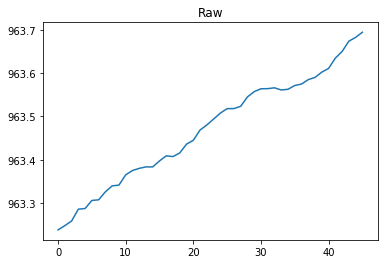

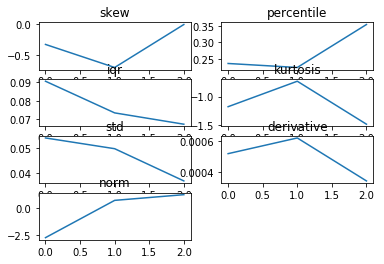

Activity-Data/Downstairs/4/Downstairs4Pressure_clean.csv


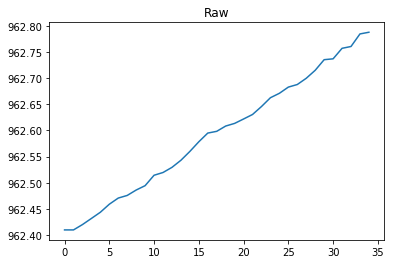

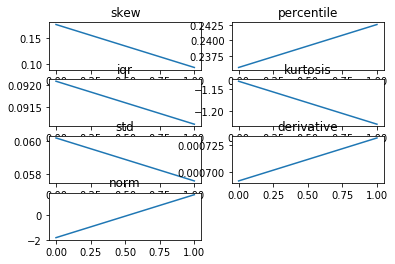

Activity-Data/Downstairs/5/Downstairs5Pressure_clean.csv


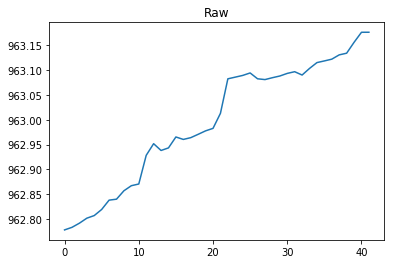

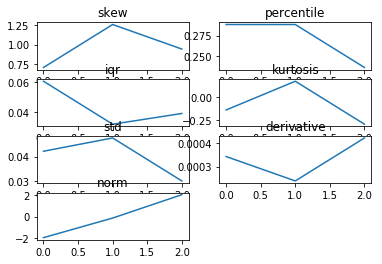

Activity-Data/Downstairs/6/Downstairs6Pressure_clean.csv


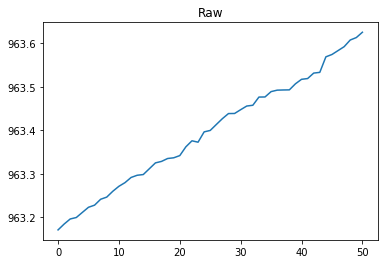

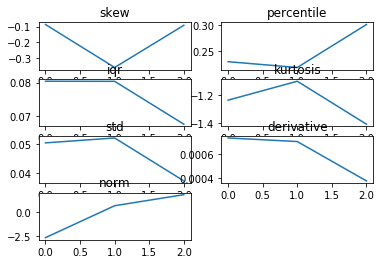

In [11]:
for downstairs_file in downstairs_files:
    create_features(downstairs_file, 5000, 1)

Activity-Data/Samsung/061217/Esc_down/Esc_down_1/Esc_down_1Pressure_clean.csv


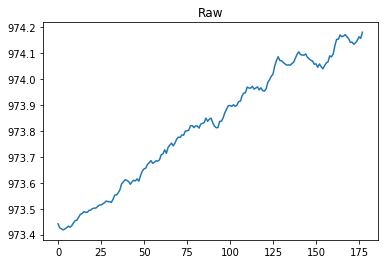

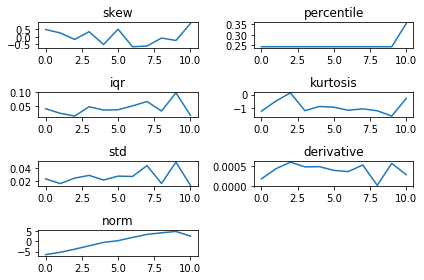

Activity-Data/Samsung/061217/Esc_down/Esc_down_2/Esc_down_2Pressure_clean.csv


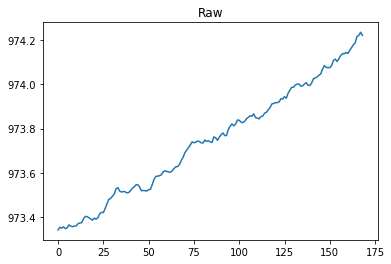

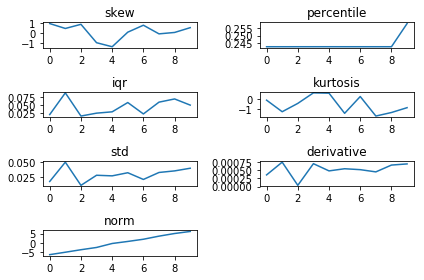

Activity-Data/Samsung/061217/Esc_down/3/Esc_d2Pressure_clean.csv


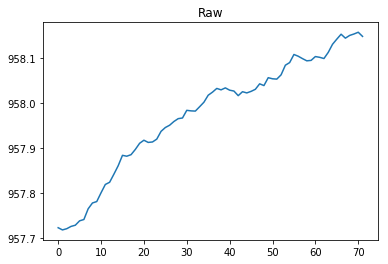

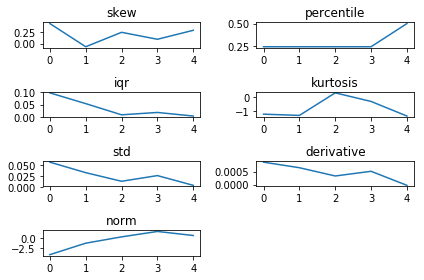

Activity-Data/2812/Escalator_down/1/Ed_1Pressure_clean.csv


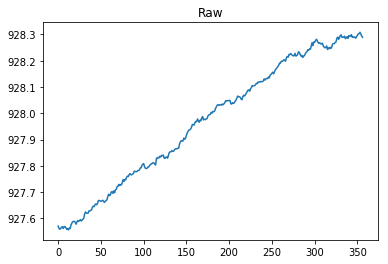

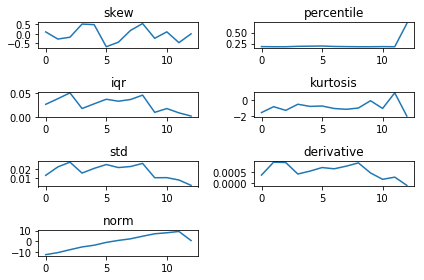

Activity-Data/2812/Escalator_down/2/Ed_2Pressure_clean.csv


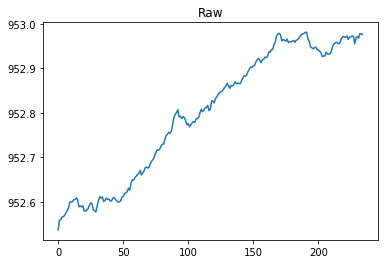

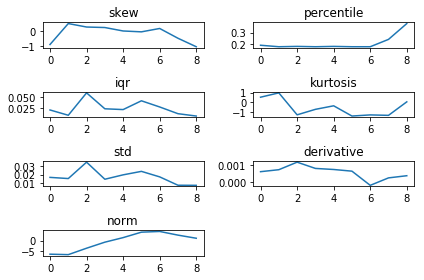

Activity-Data/2812/Escalator_down/3/Ed_7Pressure_clean.csv


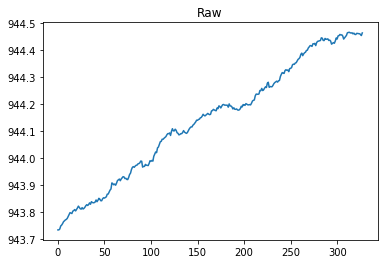

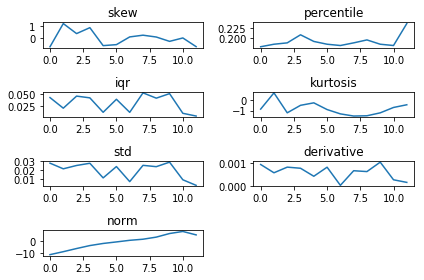

Activity-Data/2912/Escalator_down/1/Ed_1Pressure_clean.csv


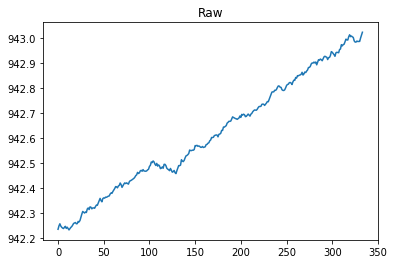

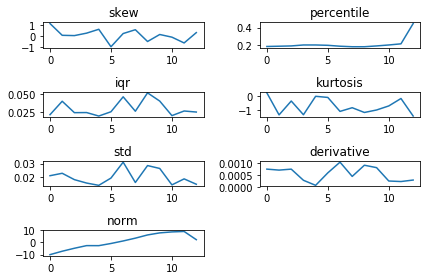

Activity-Data/2912/Escalator_down/2/Ed_2Pressure_clean.csv


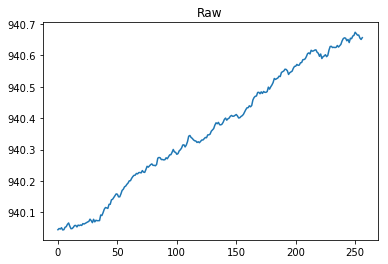

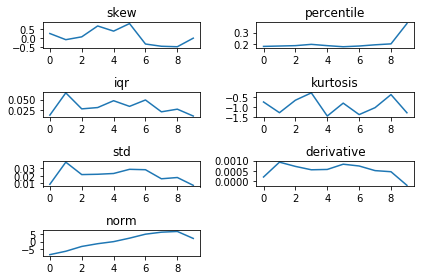

Activity-Data/2912/Escalator_down/3/Ed_3Pressure_clean.csv


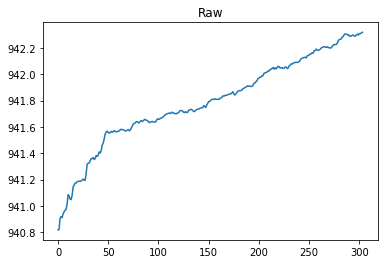

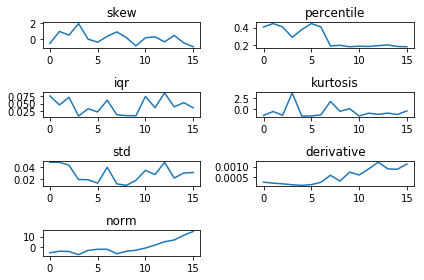

Activity-Data/2912/Escalator_down/4/Ed_5Pressure_clean.csv


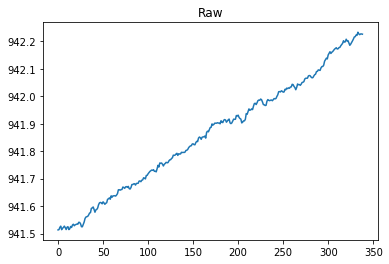

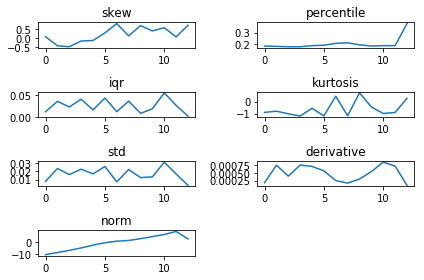

In [9]:
for ed_file in escalator_down_files[:10]:
    create_features(ed_file, 3000, 1)

Activity-Data/1912/Esc_Up/1/Esc_up_1Pressure_clean.csv


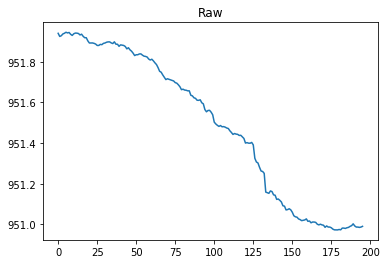

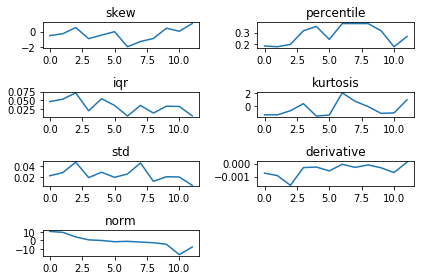

Activity-Data/1912/Esc_Up/2/Esc_up_2Pressure_clean.csv


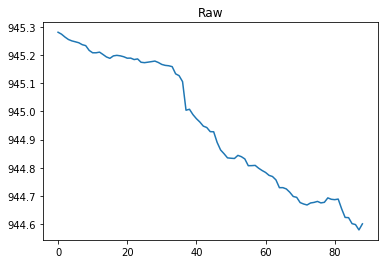

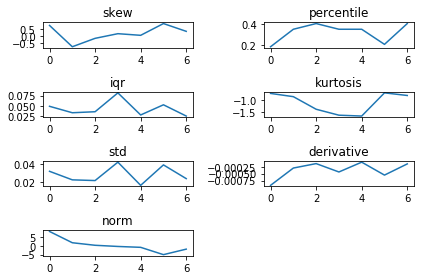

Activity-Data/1912/Esc_Up/3/Esc_up_3Pressure_clean.csv


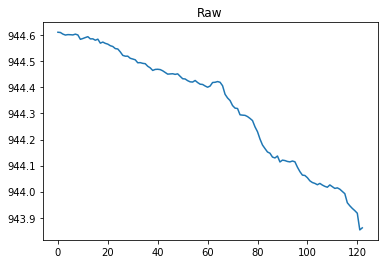

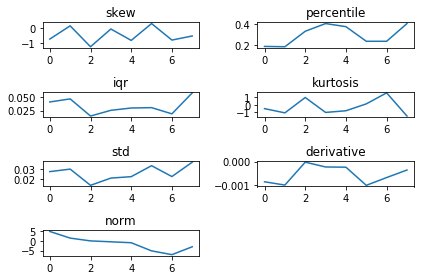

Activity-Data/1912/Esc_Up/4/Esc_Up_4Pressure_clean.csv


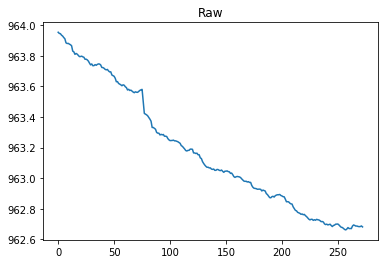

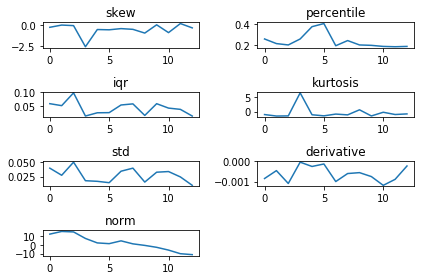

Activity-Data/Samsung/061217/Esc_Up/Esc_Up_1/Esc_Up_1Pressure_clean.csv


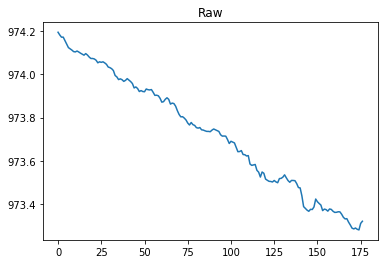

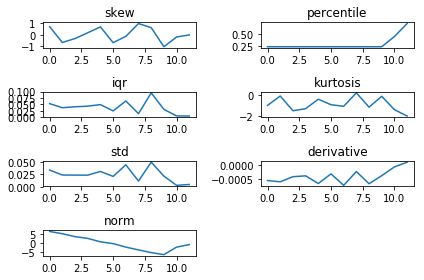

Activity-Data/Samsung/061217/Esc_Up/Esc_Up_2/Esc_Up_2Pressure_clean.csv


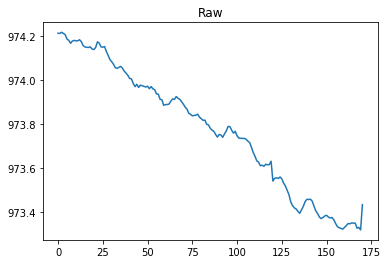

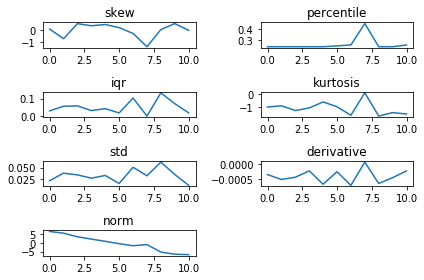

Activity-Data/Samsung/061217/Esc_Up/3/Esc_Up_3Pressure_clean.csv


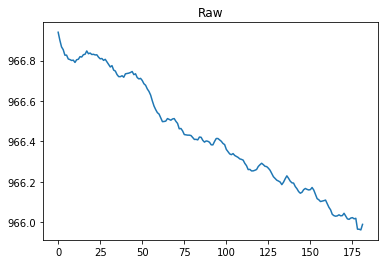

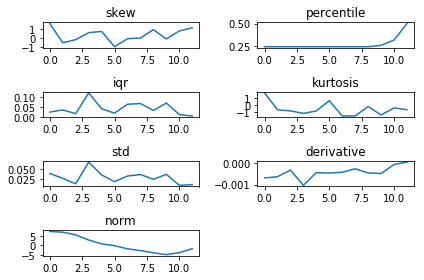

Activity-Data/Samsung/061217/Esc_Up/4/Esc_up_4Pressure_clean.csv


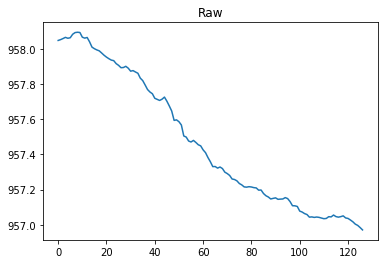

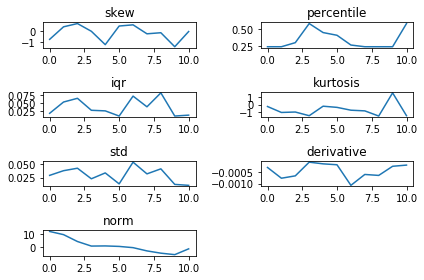

Activity-Data/Samsung/061217/Esc_Up/5/Esc_up_5Pressure_clean.csv


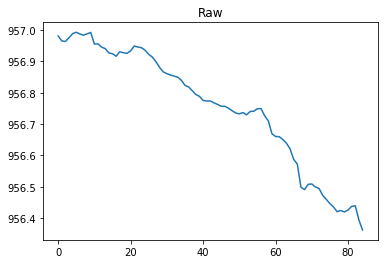

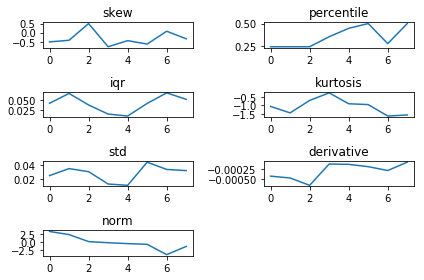

Activity-Data/2012/Esc_Up/1/Esc_up_1Pressure_clean.csv


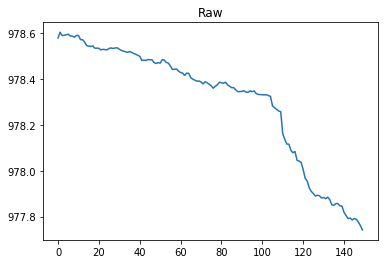

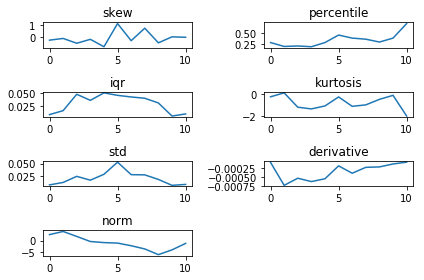

In [10]:
for eu_file in escalator_up_files[:10]:
    create_features(eu_file, 3000, 1)

Activity-Data/1912/Lift_Down/1/Lift_down_9Pressure_clean.csv


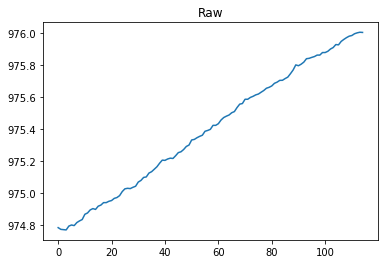

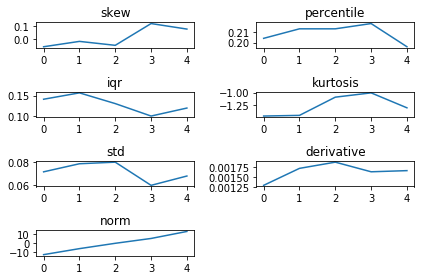

Activity-Data/Samsung/061217/Lift_Down/1/Lift_Down_2Pressure_clean.csv


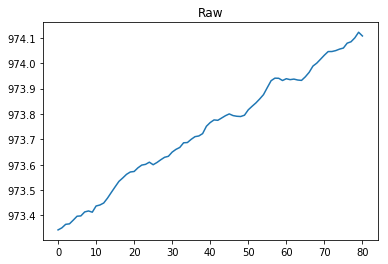

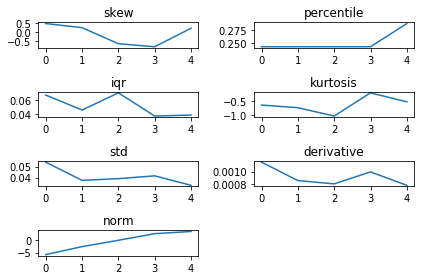

Activity-Data/Samsung/061217/Lift_Down/2/Lift_down_3Pressure_clean.csv


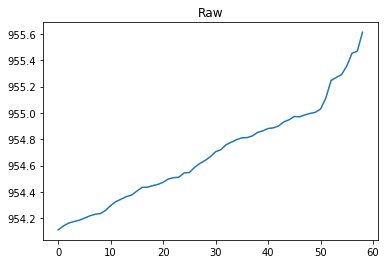

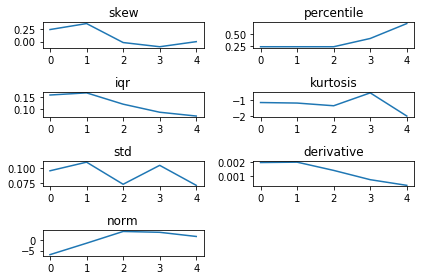

Activity-Data/Samsung/061217/Lift_Down/3/Lift_down_Pressure_clean.csv


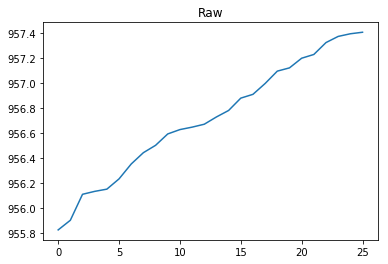

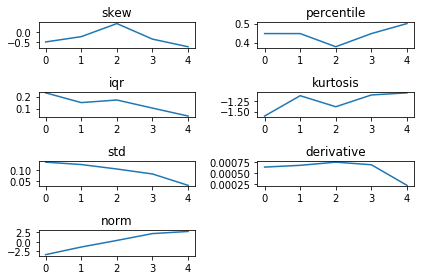

Activity-Data/2812/Lift_down/1/Ld_1Pressure_clean.csv


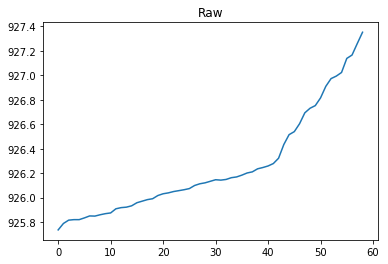

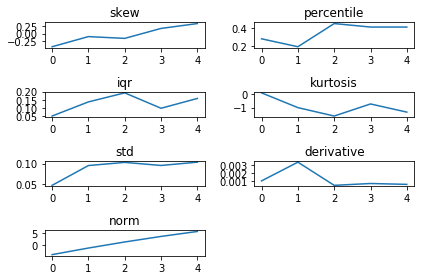

Activity-Data/2812/Lift_down/2/Ld_4Pressure_clean.csv


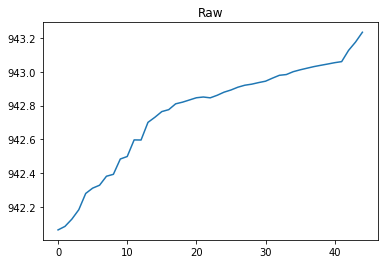

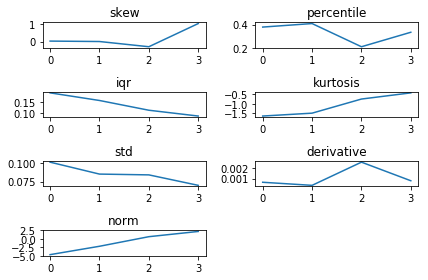

Activity-Data/2812/Lift_down/3/Ld_8Pressure_clean.csv


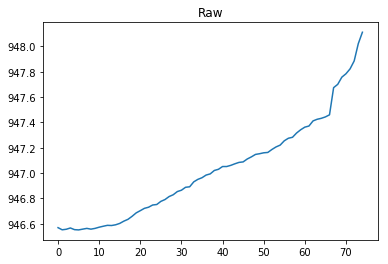

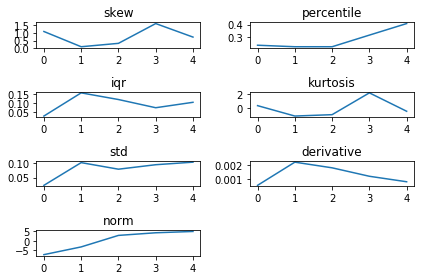

Activity-Data/2912/Lift_down/1/Ld_1Pressure_clean.csv


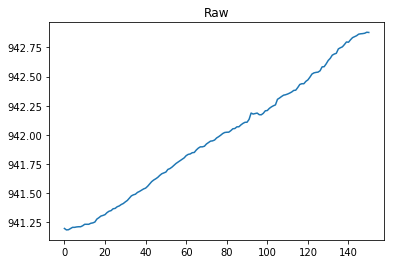

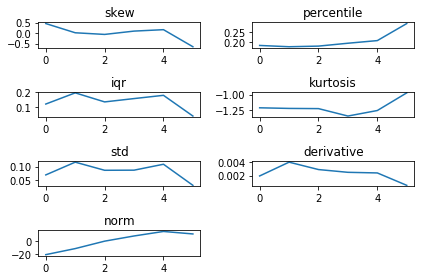

Activity-Data/2912/Lift_down/2/Ld_3Pressure_clean.csv


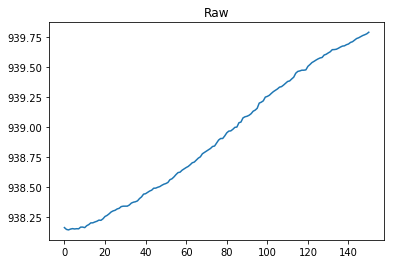

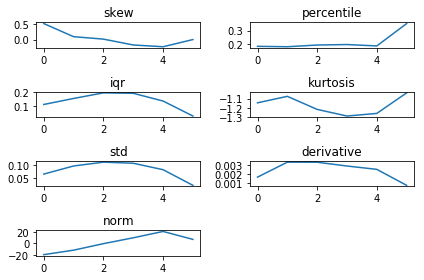

Activity-Data/2912/Lift_down/3/Ld_7Pressure_clean.csv


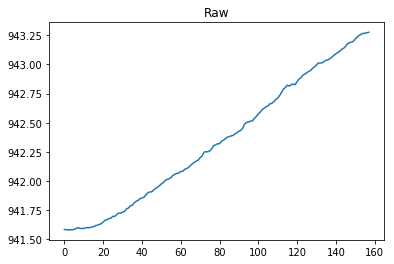

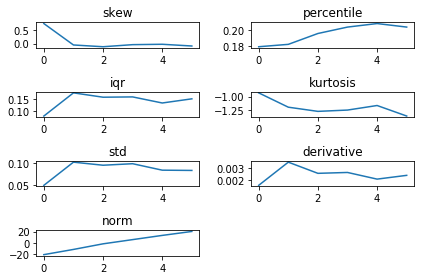

In [11]:
for ld_file in lift_down_files[:10]:
    create_features(ld_file, 3000, 1)

Activity-Data/1912/Lift_Up/1/Lift_up_1Pressure_clean.csv


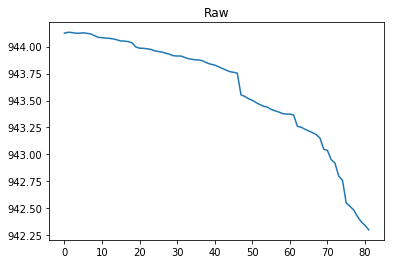

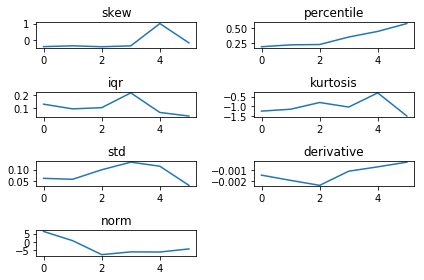

Activity-Data/1912/Lift_Up/2/Lift_up_4Pressure_clean.csv


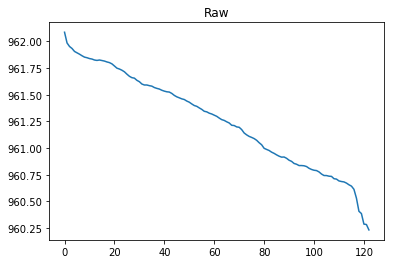

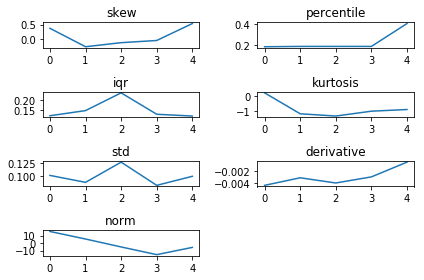

Activity-Data/1912/Lift_Up/3/Lift_up_9Pressure_clean.csv


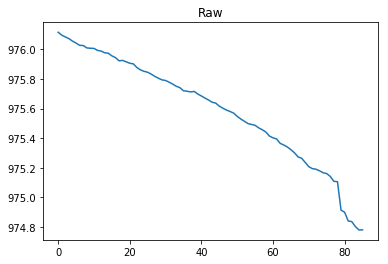

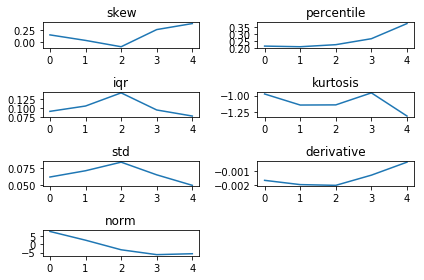

Activity-Data/Samsung/061217/Lift_Up/1/Lift_Up_2Pressure_clean.csv


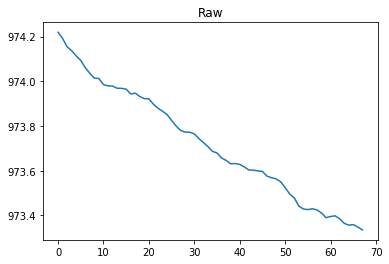

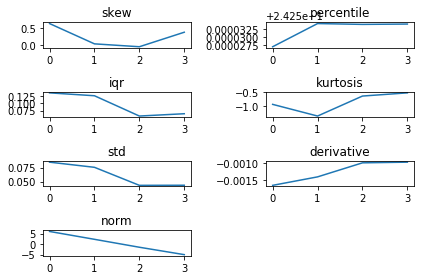

Activity-Data/Samsung/061217/Lift_Up/2/Lift_up_5Pressure_clean.csv


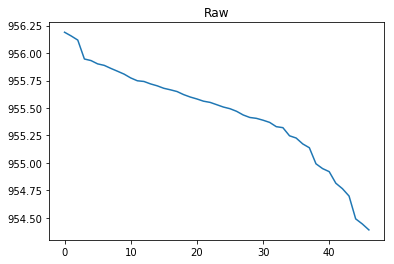

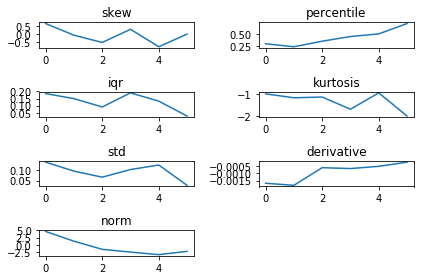

Activity-Data/2812/Lift_up/1/Lu_1Pressure_clean.csv


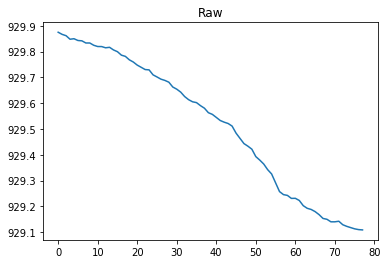

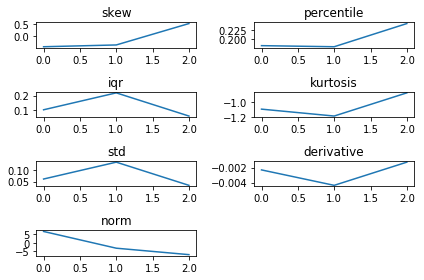

Activity-Data/2812/Lift_up/2/Lu_6Pressure_clean.csv


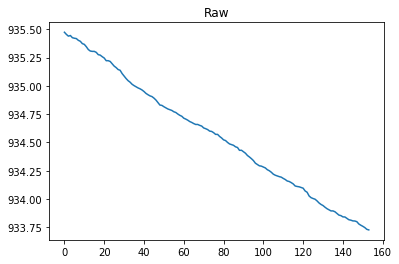

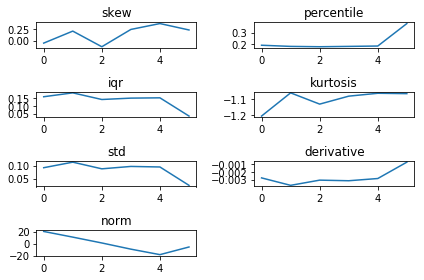

Activity-Data/2812/Lift_up/3/Lu_10Pressure_clean.csv


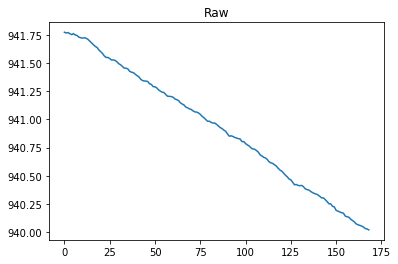

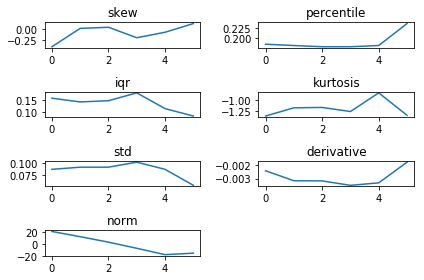

Activity-Data/2912/Lift_up/1/Lu_1Pressure_clean.csv


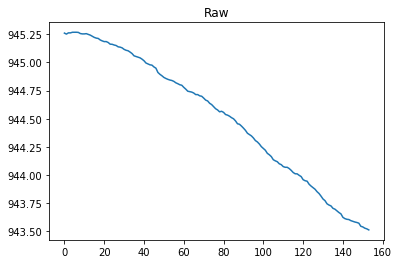

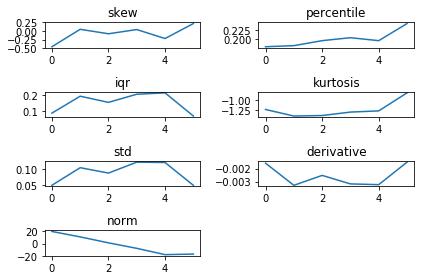

Activity-Data/2912/Lift_up/2/Lu_2Pressure_clean.csv


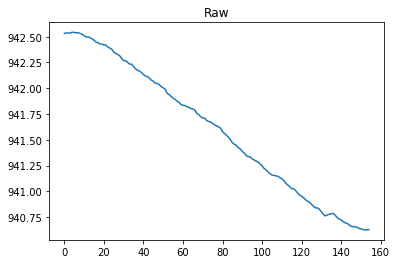

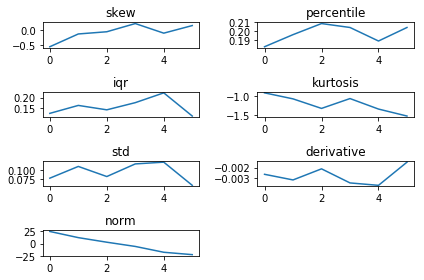

In [12]:
for lu_file in lift_up_files[:10]:
    create_features(lu_file, 3000, 1)

In [12]:
# create_features(downstairs_files[5], 3000, 1)

In [13]:
# create_features(downstairs_files[5], 5000, 1)


In [14]:
# input_file = downstairs_files[5]
# windows_time = 5000
# col_index = 1
# usecols = [0,1,2]
# df = pd.read_csv(input_file, delimiter=',', header=0, skipinitialspace=True, usecols=usecols)
# windows, ts_windows = create_sliding_windows_by_time(df, col_index, windows_time)
# skew_windows = compute_skew_window(windows)
# percentile = compute_percentile_norm_window(windows)
# iqr = compute_inter_quartile_distance_window(windows)
# kurtosis = compute_kurtosis_window(windows)
# std_deviation = compute_std_deviation_window(windows)
# derivative = compute_sum_derivative_window(windows, ts_windows)

In [15]:
# print(df.head())

In [16]:
# median = np.median(df['pressure'].values)
# print(median)
# df['pressure_norm'] = df['pressure'].apply(lambda x: x-median)
# print(df.head())
# print(df.tail())

In [17]:
# tf, wf = create_sliding_windows_by_time(df, 3, 3000)
# print(tf, wf)

In [18]:
# print(compute_norm_window(tf))

In [19]:
# print([sum(i) for i in tf])

In [20]:
# print(df.head())
# print(windows, ts_windows)

In [21]:
# print(skew_windows, iqr, percentile, iqr, kurtosis, std_deviation, derivative)

In [22]:
# input_file = climbing_files[0]
# windows_time = 3000
# col_index = 1
# usecols = [0,1,2]
# df = pd.read_csv(input_file, delimiter=',', header=0, skipinitialspace=True, usecols=usecols)
# windows, ts_windows = create_sliding_windows_by_time(df, col_index, windows_time)
# skew_windows = compute_skew_window(windows)
# percentile = compute_percentile_norm_window(windows)
# iqr = compute_inter_quartile_distance_window(windows)
# kurtosis = compute_kurtosis_window(windows)
# std_deviation = compute_std_deviation_window(windows)
# derivative = compute_sum_derivative_window(windows, ts_windows)

In [23]:
# print(df.head())
# print(windows, ts_windows)

In [24]:
# print(skew_windows, iqr, percentile, iqr, kurtosis, std_deviation, derivative)print(skew_windows, iqr, percentile, iqr, kurtosis, std_deviation, derivative)